# Dimensionality Reduction

For this tab, I focused more on the text data since I thought PCA and TSNE method would perform better on my vectorized text data rather than my record data which contains categorical data.

## Project Proposal
### What is PCA?

PCA(Principal Component Analysis) is a  dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. The idea of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.[^1]

The steps of PCA is: 

1. Standardization
2. Covariance Matrix Computation
3. Compute the Eigenvectors and Eigenvalues of the covariance matrix to identify the components

### What is t-SNE?

t-SNE is also one of the dimensionality reduction algorithms and is useful when dealing with high-dimensional datasets.[^2] It is often used to visualize complex datasets into two and three dimensions, allowing us to understand more about underlying patterns and relationships in the data.[^3]

It is sensitive to its hyperparameters such as perplexity, learning rate, and the number of iterations, which can significantly impact the quality of the resulting visualization. It's essential to tune these parameters carefully to achieve meaningful visualizations that accurately represent the structure of the high-dimensional data in lower-dimensional space.

### PCA vs. t-SNE
PCA is a linear technique that works best with data that has a linear structure. It seeks to identify the underlying principal components in the data by projecting onto lower dimensions, minimizing variance, and preserving large pairwise distances. 

t-SNE, on the other hand, is a nonlinear technique that focuses on preserving the pairwise similarities between data points in a lower-dimensional space. t-SNE is concerned with preserving small pairwise distances whereas, PCA focuses on maintaining large pairwise distances to maximize variance.

In summary, PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points in a lower-dimensional space, making it quite a good algorithm for visualizing complex high-dimensional data.

[^1]: https://builtin.com/data-science/step-step-explanation-principal-component-analysis
[^2]: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a
[^3]: https://www.datacamp.com/tutorial/introduction-t-sne

## Tools
Followings are the tools that I used for dimensionality reduction.


* Python
* pandas
* numpy
* scikit-learn
* matplotlib
* seaborn

## Code Implementation for record data
### PCA

I will perform PCA for my record data. Since my record data has more categorical data, I will convert these categorical data to numerical data. Unlike the clustering tab, I used label encoder for this tab. 
Then, I will use PCA and TSNE method for my converted data. 

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

import requests
import json
import re

api_key = 'a078005c866644ab8dce1c6637ec465f'

### Starting

In [280]:
# load and clean the data
pca = pd.read_csv("./data/wild_life_cleaned.csv")
pca = pca.drop(['IUCN Category', 'SPEC', 'COU'], axis=1)

# convert the categorical data to numerical data
label_encoder = LabelEncoder()
pca['IUCN'] = label_encoder.fit_transform(pca['IUCN'])
pca['Species'] = label_encoder.fit_transform(pca['Species'])
pca['Country'] = label_encoder.fit_transform(pca['Country'])

# standardize the data
scaler = StandardScaler()
x = pca.drop(columns=['Country'])
X = scaler.fit_transform(x)
pd.DataFrame(X, columns=x.columns, index=x.index)

,IUCN,Species,Value
0,0.859931,0.348895,-0.048754
1,-0.925051,0.348895,-0.129680
2,-1.520045,0.348895,-0.137387
3,1.454925,0.348895,-0.125826
4,-0.330057,0.348895,-0.113784
...,...,...,...
1996,0.264937,0.041886,-0.139520
1997,0.859931,0.962913,0.188485
1998,0.859931,0.041886,0.348410
1999,0.264937,0.962913,-0.139201


#### Covariance Matrix

In [281]:
cov_matrix = np.cov(X, rowvar=False)
print(cov_matrix)

[[1.0005     0.00542884 0.10560787]
 [0.00542884 1.0005     0.0219876 ]
 [0.10560787 0.0219876  1.0005    ]]


#### Standardization

In [ ]:
# standardize the data
X = pca.drop(columns=['Country'])
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

#### Computing Eigen Values and Eigen Vectors 

In [282]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.10957382 0.89358823 0.99833795]
Eigenvectors:
[[-0.6892509  -0.69558824  0.20270718]
 [-0.17598416 -0.11067068 -0.97815212]
 [-0.70282485  0.70986549  0.04613264]]


#### Choosing and Plotting the Principal Componenets

Number of components to capture 50.0% variance: 2


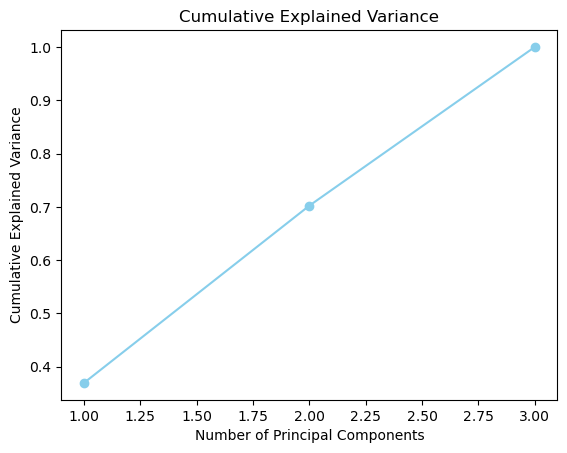

In [283]:
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='skyblue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

desired_variance = 0.50 #I want to find the number of variables it takes to reach a variance of 0.5
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to capture {desired_variance * 100}% variance: {num_components}")

Explained Variance Ratio for Each Component:
[0.3696731  0.33261301]


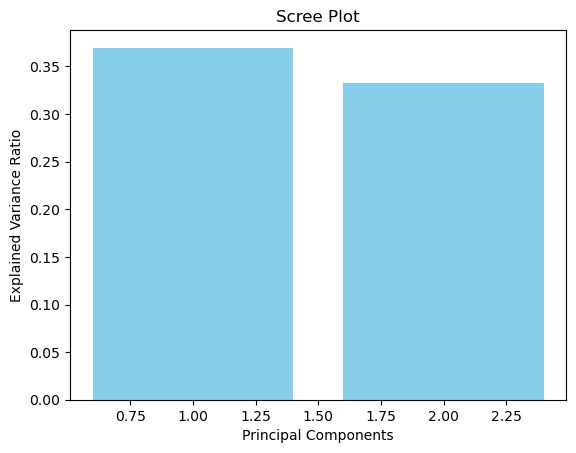

In [285]:
# PCA with components decided above
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(explained_variance_ratio)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

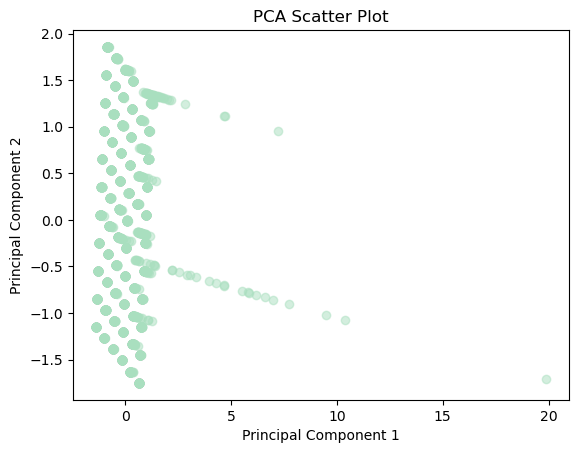

In [286]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color='#A9DFBF')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In summary, it seemed pretty successful until computing the Eigenvector. However, as we can see from the graph above, PCA doesn't seem to perform well on my record data. This was expectable, but after working on my text data with NVM, I wanted to try the original way to perform PCA. 

### TSNE

In [288]:
# load and clean the data
tsne = pd.read_csv("./data/wild_life_cleaned.csv")
tsne = tsne.drop(['IUCN Category', 'SPEC', 'COU'], axis=1)

# convert the categorical data to numerical data
label_encoder = LabelEncoder()
tsne['IUCN'] = label_encoder.fit_transform(tsne['IUCN'])
tsne['Species'] = label_encoder.fit_transform(tsne['Species'])
tsne['Country'] = label_encoder.fit_transform(tsne['Country'])

label_encoder = LabelEncoder()
tsne['Country'] = label_encoder.fit_transform(tsne['Country'])

x = tsne.drop('Country', axis=1)
y = tsne['Country']
scaler = StandardScaler()
X = scaler.fit_transform(x)

# PCA for comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

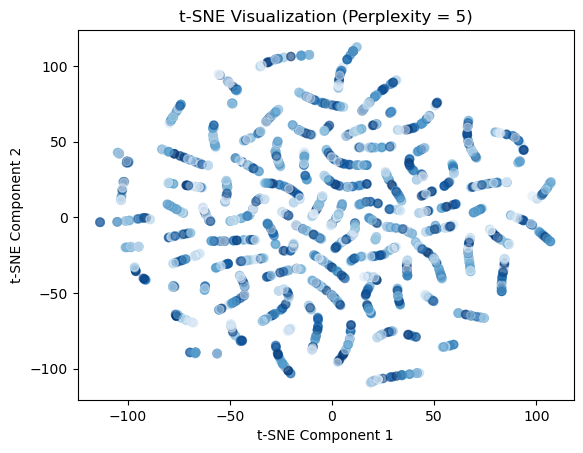

RESULTS
shape :  (2001, 2)
First few points : 
 [[ 43.623535    3.1330326]
 [-60.592705   34.252003 ]]


In [290]:
# Perplexity - 5
tsne_result_5 = TSNE(n_components=2, random_state=1000, perplexity=5, n_iter=1000).fit_transform(X)
plt.scatter(tsne_result_5[:, 0], tsne_result_5[:, 1], c=tsne['Country'], cmap='Blues', alpha=0.5)
plt.title('t-SNE Visualization (Perplexity = 5)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Results
print("RESULTS") 
print("shape : ",tsne_result_5.shape)
print("First few points : \n",tsne_result_5[0:2,:])

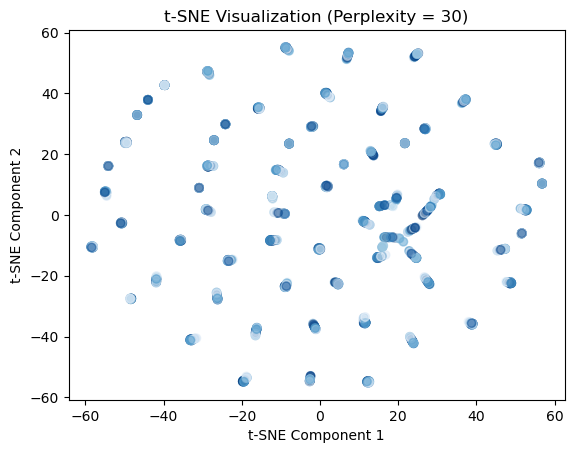

RESULTS
shape :  (2001, 2)
First few points : 
 [[ 12.5841055  -3.1769102]
 [-27.358438   16.120054 ]]


In [291]:
# Perplexity - 30
tsne_result_30 = TSNE(n_components=2, random_state=1000, perplexity=30, n_iter=1000).fit_transform(X)
plt.scatter(tsne_result_30[:, 0], tsne_result_30[:, 1], c=tsne['Country'], cmap='Blues', alpha=0.5)
plt.title('t-SNE Visualization (Perplexity = 30)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Results
print("RESULTS") 
print("shape : ",tsne_result_30.shape)
print("First few points : \n",tsne_result_30[0:2,:])

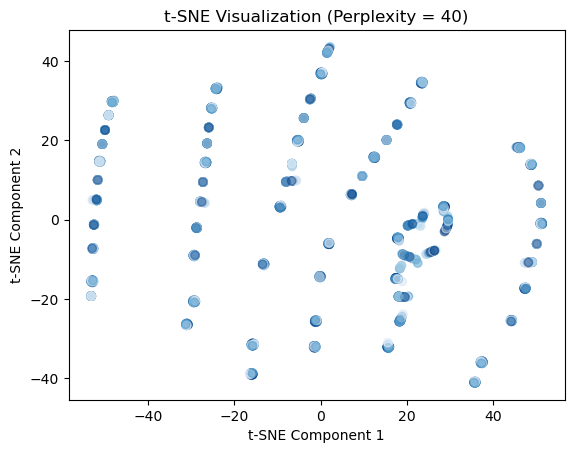

RESULTS
shape :  (2001, 2)
First few points : 
 [[ 18.140623  -5.123523]
 [-26.87944   14.265589]]


In [292]:
# Perplexity - 40
tsne_result_40 = TSNE(n_components=2, random_state=1000, perplexity=40, n_iter=1000).fit_transform(X)
plt.scatter(tsne_result_40[:, 0], tsne_result_40[:, 1], c=tsne['Country'], cmap='Blues', alpha=0.5)
plt.title('t-SNE Visualization (Perplexity = 40)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Results
print("RESULTS") 
print("shape : ",tsne_result_40.shape)
print("First few points : \n",tsne_result_40[0:2,:])

It seems perplexity of 5 gives us better results than that of 30 and 40. I will provide more explanations on the Projet Report below with the TSNE results for my text data. 

## Code Implementation for text data
### PCA

Since my record dataset has not provided a satisfying result, I will also perform the same process on my vectorized text data. For the ease of use, I collected a text data for only one topic: 'Climate Change,' using News API. My record dataset is more focused on categorical data, so hopefully the clustering methods will work on the text data. 

After collecting the data using the News API, I used tf-idf vectorizer to convert the text data to numerical data. Then instead of using the PCA package, I used NMF package for my text data and plotted the variance ratio from scratch. To provide a little bit of a basic information of NMF method, NMF stands for Non-negative Matrix Factorization, and it is one of the dimensionality reduction techniques. Unlike traditional matrix factorization techniques that work on any real-valued matrix, NMF assumes that the input matrix and its factors are non-negative.

In [245]:
# functions for collecting the data
def fetch_article_and_save_to_json(api_key, query, filename = 'articles.json'):
    url = 'https://newsapi.org/v2/everything'
    params = {
      "q": "query",
      "apiKey": api_key,
      "language": "en",
    }
    response = requests.get(url, params = params)
    if response.status_code==200:
        articles_data = response.json()
        
        with open(filename, 'w', encoding = 'utf-8') as f:
            json.dump(articles_data, f, ensure_ascii=False, indent=4)
        return articles_data['articles']
    
    else:
        print(f'Failed to fetch articles: {response.status_code}')
        return None
    
def tfidf_vectorize(articles):
    texts = [article['title'] + ' ' + (article['description'] if article['description'] else '') for article in articles]
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix

In [246]:
articles = fetch_article_and_save_to_json(api_key, 'climate change')
tfidf_matrix = tfidf_vectorize(articles)
clustering_model = AgglomerativeClustering(n_clusters=10, compute_distances=True)
clustering_model = clustering_model.fit(tfidf_matrix.toarray())

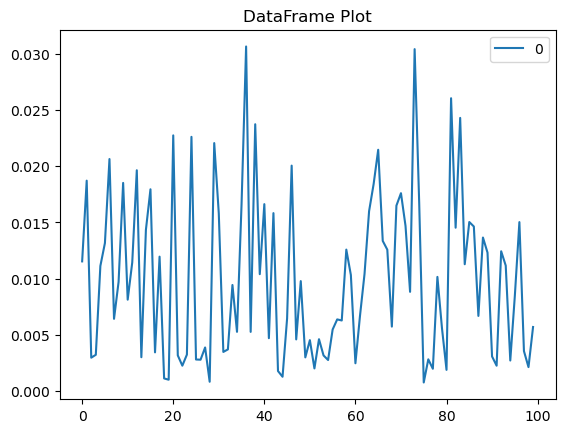

In [258]:
pca = NMF(n_components=6)
pca_matrix = tfidf_matrix
principal_components = pca.fit_transform(pca_matrix)

# calculate the variance ratio from scratch
explained_variance_ratio = np.sum(principal_components, axis=1)/np.sum(principal_components)

variance_df = pd.DataFrame(explained_variance_ratio)
plot = variance_df.plot(title="DataFrame Plot")

This is the variance ratio, but is unordered. So the next step I did was to order it and plot the cumulative variance ratio. Since the text data has 100 rows in the first place, the number of tokens is also 100. 

In [259]:
variance_df.reset_index(inplace=True)
variance_df = variance_df.rename(columns = {'index':'token_numbers'})
variance_df.rename(columns={0: "variance"}, inplace=True)

variance_df['variance']= variance_df['variance'].astype(float)
variance_df = variance_df.sort_values(by="variance",ascending=False)
variance_df = variance_df.reset_index(drop=True)

cum = 0
cum_df = pd.DataFrame()
variance_df['cum_sum'] = variance_df['variance'].cumsum()

variance_df

,token_numbers,variance,cum_sum
0,36,0.030683,0.030683
1,73,0.030447,0.061130
2,81,0.026070,0.087200
3,83,0.024316,0.111516
4,38,0.023750,0.135267
...,...,...,...
95,44,0.001242,0.996402
96,18,0.001092,0.997494
97,19,0.000978,0.998472
98,28,0.000796,0.999268


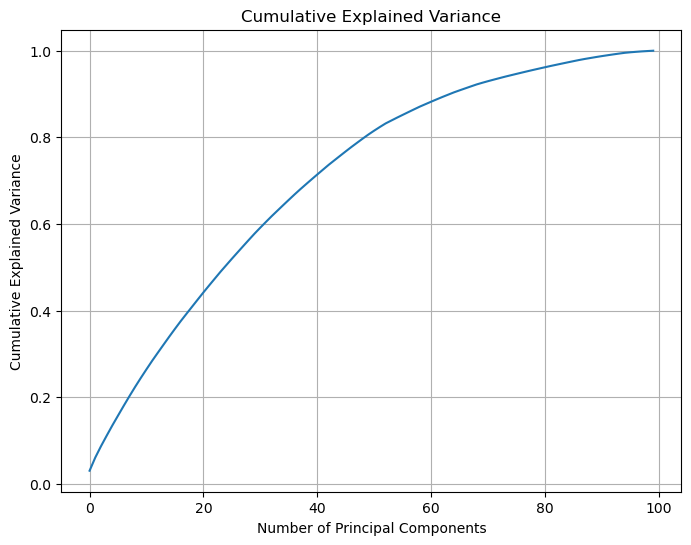

In [262]:
variance_df['cum_sum'].plot(figsize=(8, 6))  # Plotting the column
plt.xlabel('Number of Principal Components')           # Set the label for the x-axis
plt.ylabel('Cumulative Explained Variance')           # Set the label for the y-axis
plt.title('Cumulative Explained Variance')              # Set the plot title
plt.grid(True)                       # Enable gridlines
plt.show()        

In [260]:
np.where(variance_df['cum_sum']>= 0.8)

(array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
        83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


After sorting the variance, we calculated the cumulative variance values and figured out where the cumulative variance has the 80% of the data. Since we got the data from 49 to 99, we can cut out __50 rows__ of our data. This means we can keep the first 50 rows and remove all the rest of the rows which is way more efficient. According to the data frame, we can also figure out the maximum value is the data of index 36. This index can differ every time we run the code, but it will generally hover around 30 to 40. The cumulative explained variance also supports this assumption. 

-------
From this section, this is the way I tried to perform dimensionality reduction with Prof.Nakul. 

In [264]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df['Cluster'] = clustering_model.labels_
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,0.000000,0.253687,0.000655,0.026333,0.000000,0.010832,1
1,0.140478,0.000000,0.000000,0.000000,0.000682,0.332356,0
2,0.001418,0.000942,0.020220,0.000000,0.004576,0.047254,1
3,0.000000,0.008596,0.009435,0.021686,0.002844,0.038391,1
4,0.000000,0.000000,0.000000,0.000000,0.000234,0.280951,0
...,...,...,...,...,...,...,...
95,0.000000,0.035128,0.178523,0.000000,0.000000,0.000000,1
96,0.000000,0.000000,0.380086,0.000000,0.000000,0.000000,9
97,0.000000,0.008506,0.078844,0.000000,0.001546,0.000408,1
98,0.023763,0.000000,0.026930,0.002438,0.000000,0.000000,1


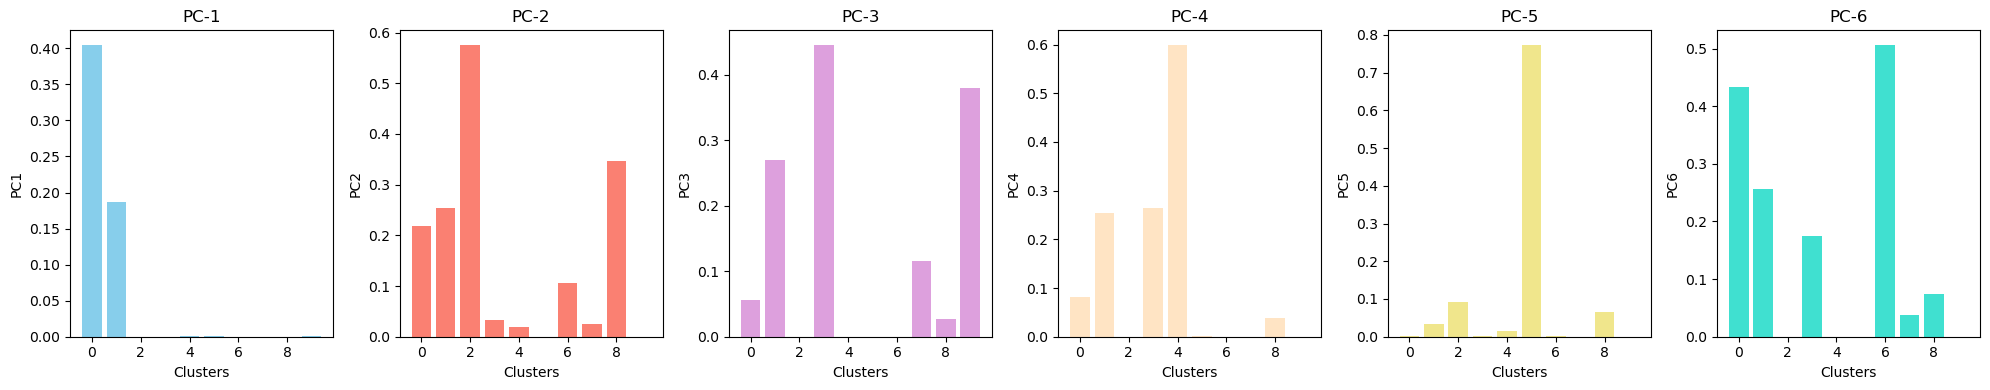

In [265]:
fig, axs = plt.subplots(1,6, figsize=(20, 4))
axs[0].bar(pca_df['Cluster'], pca_df['PC1'], color='skyblue')
axs[0].set_title('PC-1')  
axs[0].set_xlabel('Clusters')  
axs[0].set_ylabel('PC1')  

axs[1].bar(pca_df['Cluster'], pca_df['PC2'], color='salmon')
axs[1].set_title('PC-2')  
axs[1].set_xlabel('Clusters')  
axs[1].set_ylabel('PC2')  

axs[2].bar(pca_df['Cluster'], pca_df['PC3'], color='plum')
axs[2].set_title('PC-3')  
axs[2].set_xlabel('Clusters')  
axs[2].set_ylabel('PC3')  

axs[3].bar(pca_df['Cluster'], pca_df['PC4'], color='bisque')
axs[3].set_title('PC-4')  
axs[3].set_xlabel('Clusters')  
axs[3].set_ylabel('PC4') 
 
axs[4].bar(pca_df['Cluster'], pca_df['PC5'], color='khaki')
axs[4].set_title('PC-5')  
axs[4].set_xlabel('Clusters')  
axs[4].set_ylabel('PC5')

axs[5].bar(pca_df['Cluster'], pca_df['PC6'], color='turquoise')
axs[5].set_title('PC-6')
axs[5].set_xlabel('Clusters')  
axs[5].set_ylabel('PC6')    

plt.tight_layout()
plt.show()

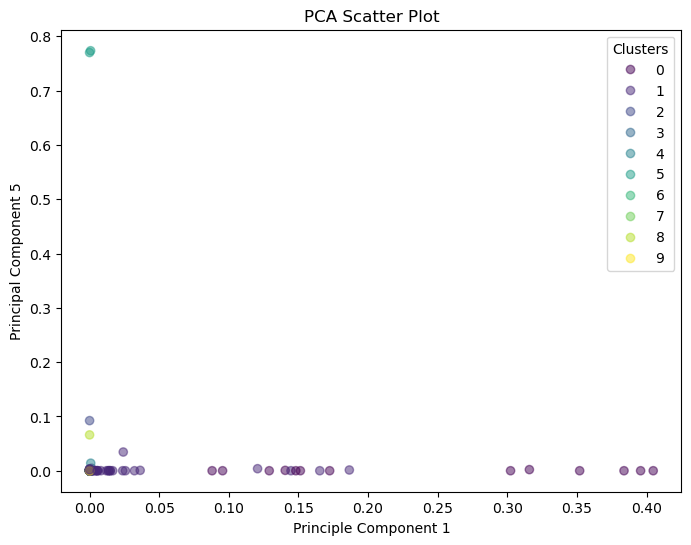

In [266]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC5'], c = pca_df['Cluster'], cmap = 'viridis', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principle Component 1')
plt.ylabel('Principal Component 5')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

From the graphs above, we can see the text data has been clustered appropriately. The first principal component has mostly been clustered to 0-th cluster. The second principal component has mostly been clustered to 2nd cluster and so on. 

/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


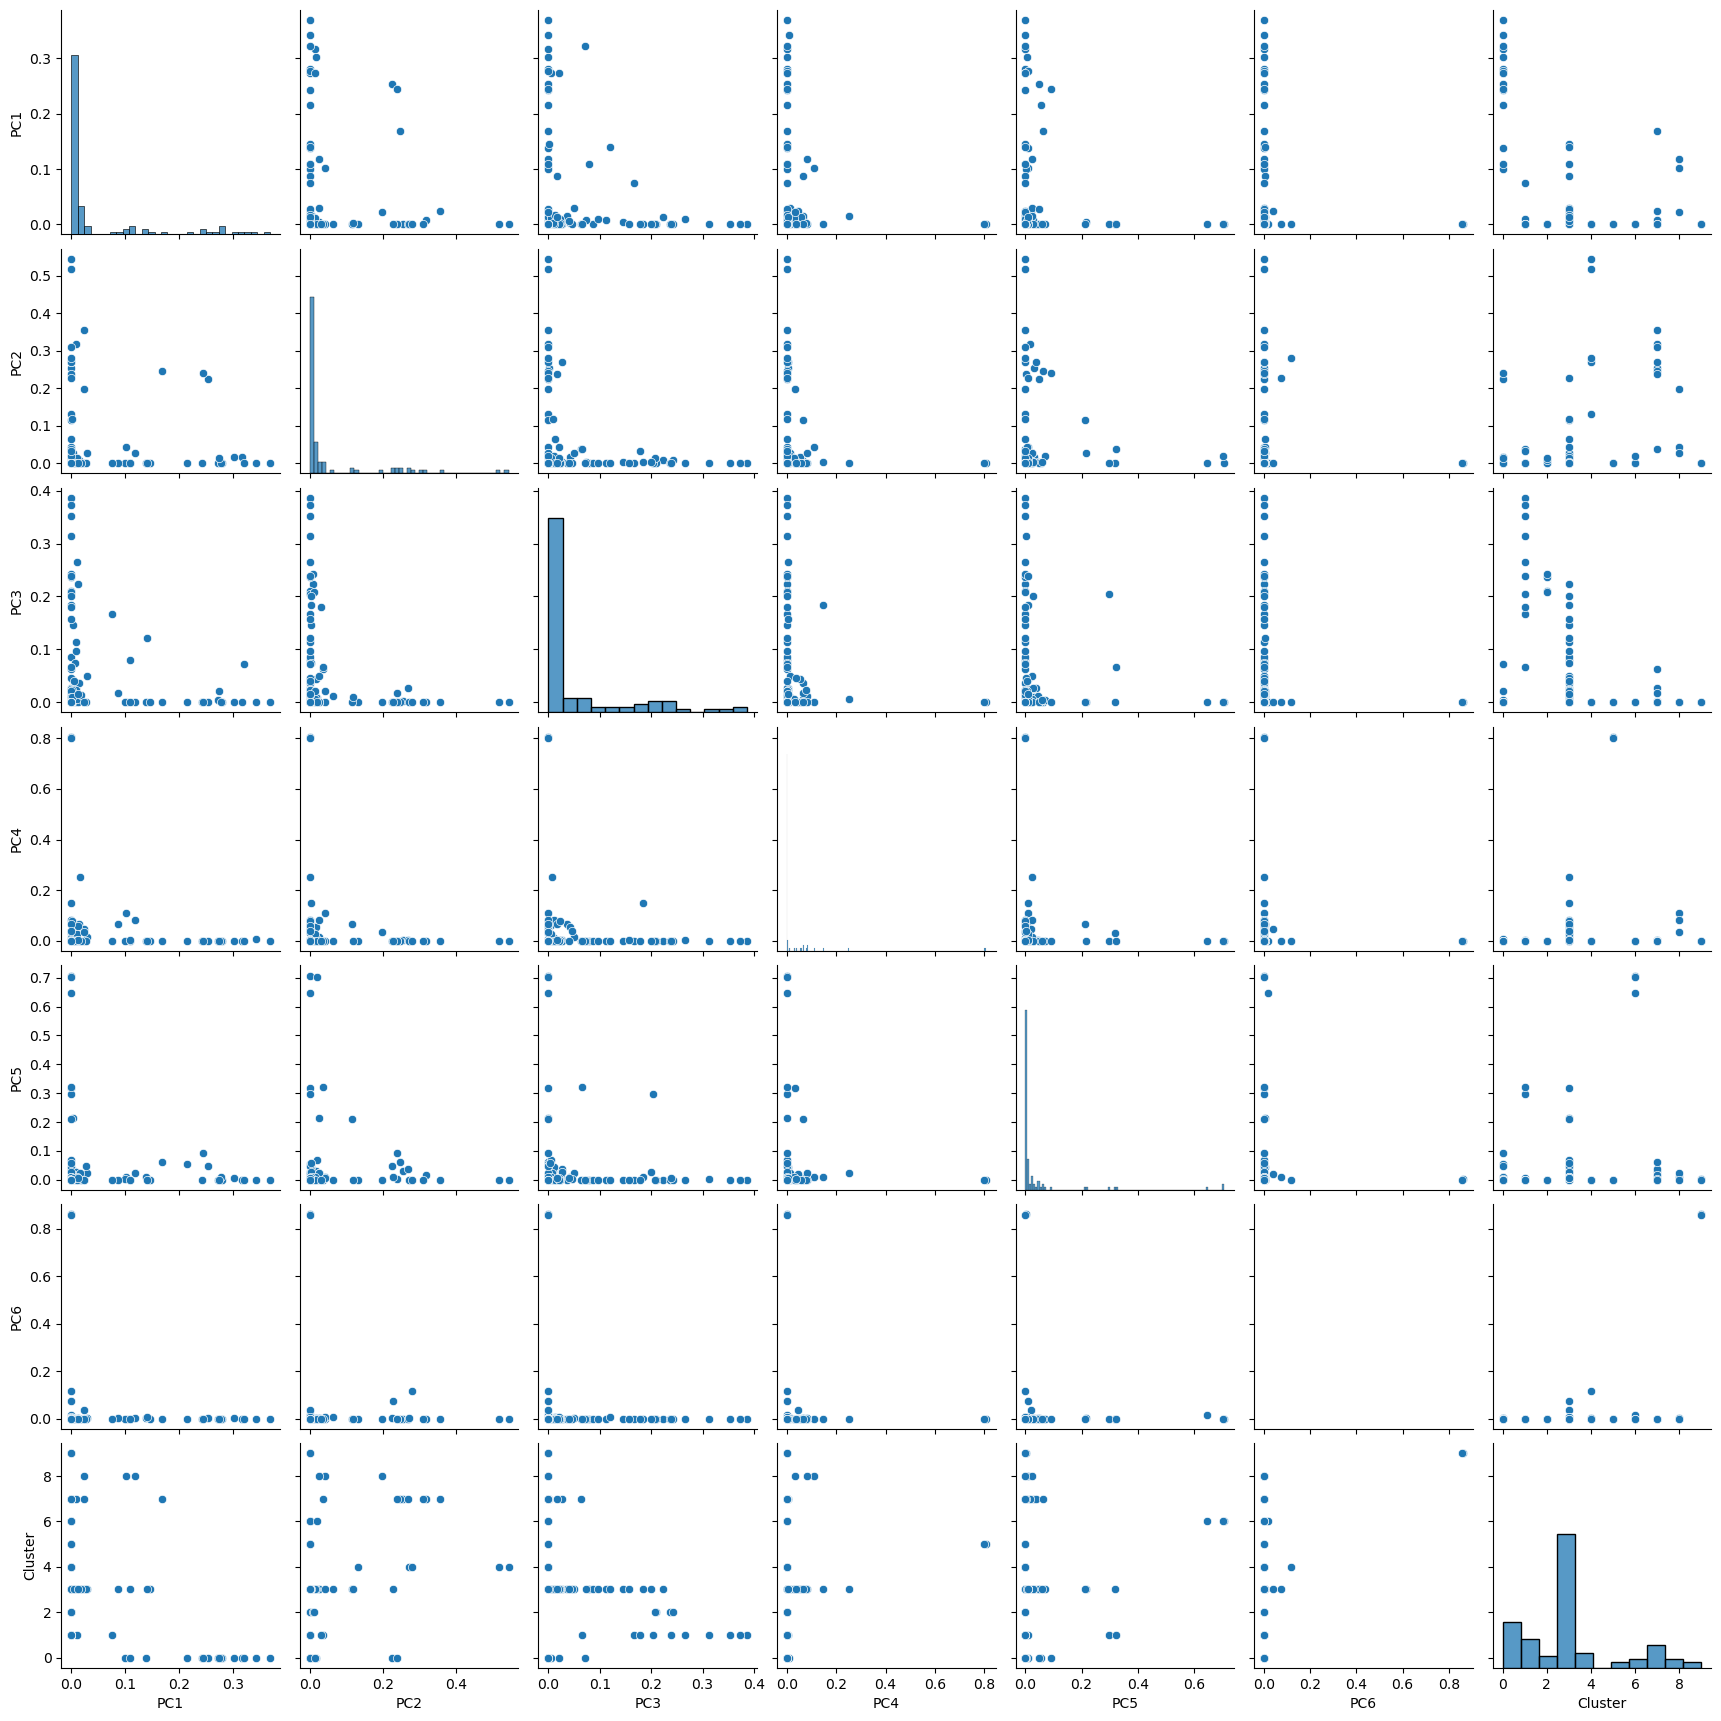

In [131]:
# Create a scatterplot matrix
sns.pairplot(pca_df)
plt.show()

This part needs improvement because based on the explained variance ratio, we wanted to keep the first 50 rows. However, for the sake of convenience, I wanted to choose the first 6 rows and see whether PCA/NMF can be meaningful for my dataset. So we need to sort the 'pca_df' in a meaningful order and this has to be improved in the future. 

### t-SNE

In [267]:
# Perform a simple PCA for further dimensionality reduction
pca_tsne = PCA(n_components=10)  
tsne_matrix = pca_tsne.fit_transform(tfidf_matrix.toarray())

In [268]:
tsne_df = pd.DataFrame(tsne_matrix)
tsne_df

,0,1,2,3,4,5,6,7,8,9
0,0.036771,0.227766,-0.090767,0.007454,-0.064515,0.058544,-0.093358,-0.055064,-0.062596,-0.192658
1,0.371534,-0.062567,0.066324,0.099689,-0.081504,0.054484,0.084702,0.058776,0.098190,0.015014
2,-0.083021,-0.009390,0.121641,-0.012993,-0.053057,-0.047911,-0.031327,-0.003560,0.042122,-0.172938
3,-0.066499,-0.005293,0.074452,0.028784,-0.065770,-0.115272,0.000446,-0.027359,-0.012672,-0.032448
4,0.122682,-0.029263,0.060644,0.144929,-0.109691,0.016663,0.138173,0.039209,0.056049,0.043412
...,...,...,...,...,...,...,...,...,...,...
95,-0.116449,-0.050296,-0.106814,-0.031066,-0.050190,0.081038,0.024078,0.055844,-0.053067,-0.012929
96,-0.176039,-0.149495,-0.189603,-0.174377,-0.011722,0.150157,0.009907,0.243717,-0.087502,-0.195067
97,-0.114009,-0.017178,0.074209,-0.029914,-0.045072,-0.070905,0.046549,0.003756,0.063347,-0.176456
98,-0.085793,-0.044940,0.031529,-0.054310,0.011878,-0.147822,-0.059042,-0.184821,0.196425,-0.011436


/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_972/419798181.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')


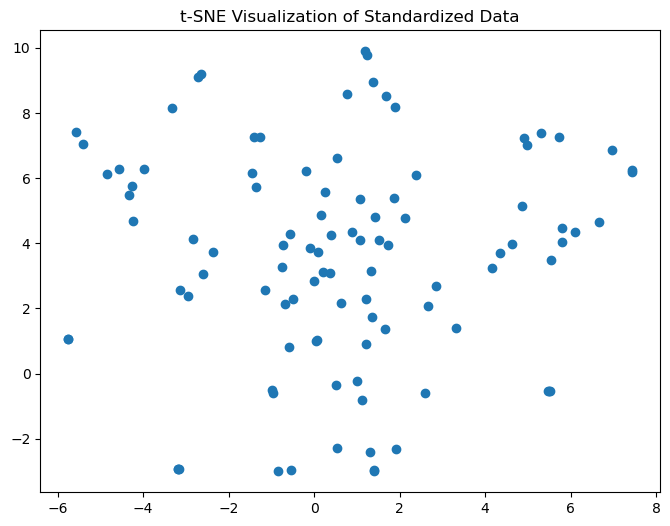

In [270]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=44)
tsne_result = tsne.fit_transform(tsne_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues') 
plt.title("t-SNE Visualization of Standardized Data")
plt.show()

/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_972/935202407.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')


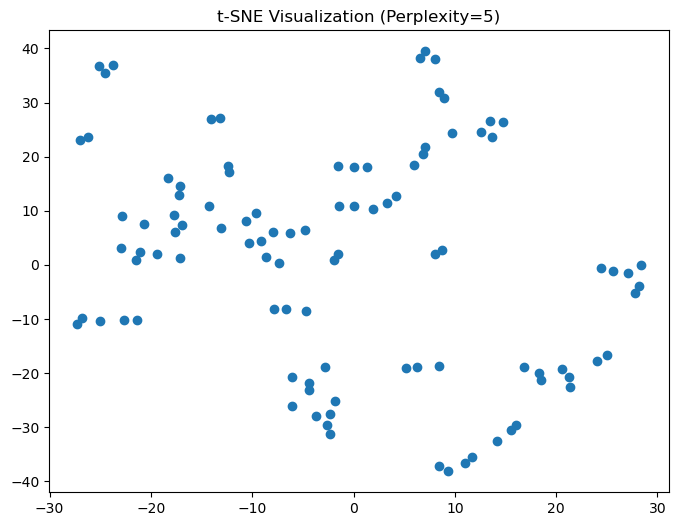

/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_972/935202407.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')


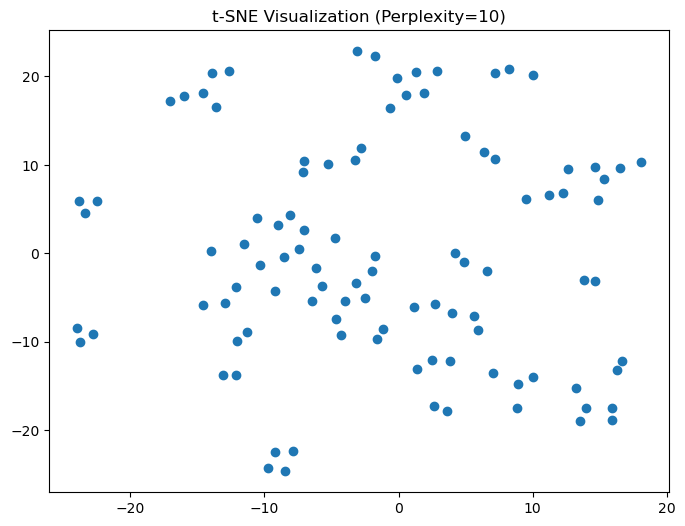

/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_972/935202407.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')


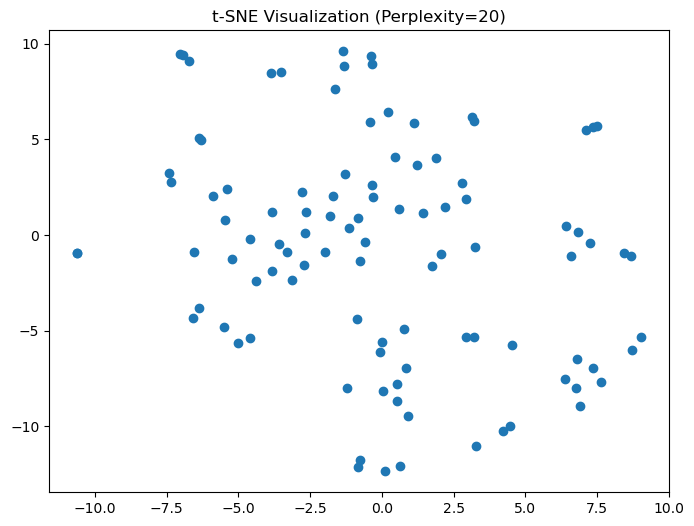

/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_972/935202407.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')


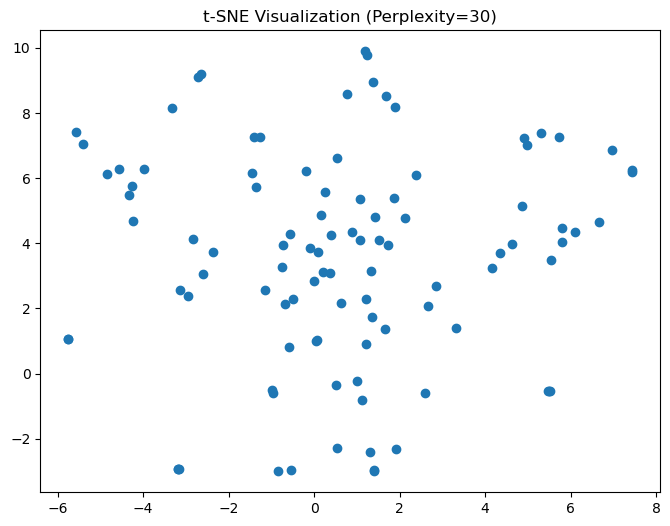

/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T/ipykernel_972/935202407.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')


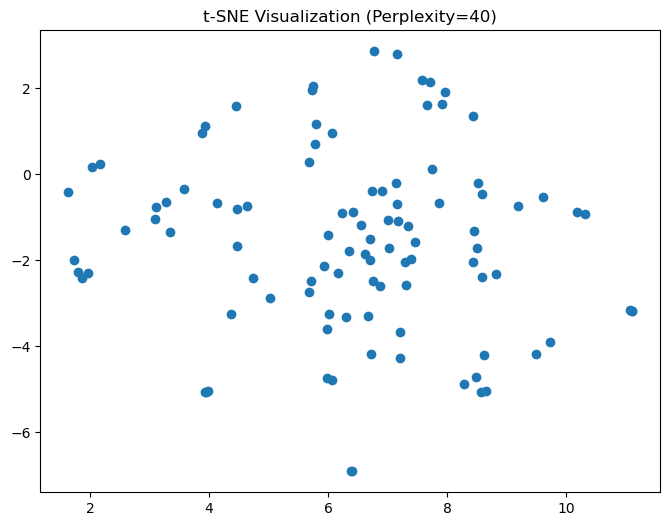

In [271]:
# Define a range of perplexity values to explore
perplexities = [5, 10, 20, 30, 40]

# Iterate over the perplexity values
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(tsne_matrix)
    
    # Create a scatter plot for the current perplexity value
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap = 'Blues')
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.show()

It seems TSNE is not a good method to know the closeness of the points for my text data. For more explanation, plase refer to the Project Report section below. 

## Project Report
### Comparison of PCA and TSE
In conclusion, I was pretty confident with my text data at first, but it turns out TSNE was not a good method for my text data. However, I am pretty confident with PCA section. For the record data, on the other hand, the results was the opposite. It seemed PCA was not giving us good results for the record data, but it seemed a better with TSNE than text data. So, I think PCA and TSNE serve different purposes and have their own strengths and weaknesses. The choice between them depends on your specific objectives and the nature of your data. PCA, on the other hand, is best for dimensionality reduction, preserving global structure, and understanding broad data relationships. TSNE is effective for local structure preservation and fine-grained pattern recognition, making it a powerful tool for data exploration and visualization.

To provide some examples of scenarios, PCA can be beneficila when we want to reduce dimensionality while preserving as much infomormation as possible, or when we want to understand the global patterns and relationships in the data. Another example when PCA can be effective is when our data has a linear structure, and when we need to remove multicollinearity. TSNE is beneficial when we are interested in exploring and visualizing local structures, clusters, and non-linear relationships. Also, it could be when the high-dimensional data contains complex, non-linear patterns that are not easily visible in the original space.

### Interpretation of my dataset on both PCA and TSNE
__From this perspective, I can say my record data seemed not to have linear relationship even though it seemed like it has, because TSNE gave us meaningful results, rather than PCA which didn't give us meaningful results. For my text data, I think it had linear relationship because PCA was much beneficial than TSNE.__